## Prepare Notebook

**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set Notebook Preferences**

In [2]:
#Set Pandas preferenes
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#Set style for matplotlib and fontdict for plots
plt.style.use('seaborn-dark')
title_dict= {'fontsize':18,
            'style': 'italic',
            'fontweight': 'semibold'}

label_dict= {'fontsize':14,
             'fontweight': 'semibold'}

#Surpress annoying warnings
warnings.filterwarnings('ignore')

**Read in data**

In [3]:
#Set path to data
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Read in training and test data
train = pd.read_csv(path + '/2020_0624_Training_Data.csv', index_col=0)
test = pd.read_csv(path + '/2020_0624_Test_Data.csv', index_col=0)

#Read in price forecasts data
data_forecasts = pd.read_csv(path + '/2020_0620_Data_Forecasts.csv', index_col=0)

**Preview Data**

In [4]:
print('Training data shape:', train.shape)
display(train.head())

print('\nTest data shape:',test.shape)
display(test.head())

Training data shape: (29789, 44)


,generation_fossil_gas,generation_fossil_gas_stationary,generation_fossil_hard_coal,generation_fossil_hard_coal_stationary,generation_hydro_pumped_storage_consumption,generation_hydro_pumped_storage_consumption_stationary,price_actual,price_actual_season,price_actual_stationary,price_actual_trend,total_load_actual,total_load_actual_season,total_load_actual_stationary,total_load_actual_trend,is_weekend,holiday,price_actual_lag_1,price_actual_lag_2,price_actual_lag_3,price_actual_lag_4,price_actual_lag_5,price_actual_lag_6,price_actual_lag_7,price_actual_lag_8,price_actual_lag_9,price_actual_lag_10,price_actual_lag_11,price_actual_lag_12,price_actual_lag_13,price_actual_lag_14,price_actual_lag_15,price_actual_lag_16,price_actual_lag_17,price_actual_lag_18,price_actual_lag_19,price_actual_lag_20,price_actual_lag_21,price_actual_lag_22,price_actual_lag_23,price_actual_lag_24,year_encoded,month_encoded,weekday_encoded,hour_encoded
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,3784.0,-821.652818,4220.0,-134.521023,972.0,131.336181,60.12,3.750959,-5.750750,62.119792,24133.0,2352.743184,-2151.597351,23931.854167,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,1.173354
2015-01-01 13:00:00,3754.0,-788.106788,4404.0,159.169985,922.0,81.075629,62.05,3.292118,-3.198368,61.956250,24713.0,2856.356263,-2121.835430,23978.479167,False,True,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,1.005509
2015-01-01 14:00:00,3779.0,-633.241441,4256.0,159.104975,941.0,30.936512,62.06,2.675646,-2.233563,61.617917,24672.0,3004.248460,-2332.248460,24000.000000,False,True,-3.198368,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-0.006046
2015-01-01 15:00:00,3708.0,-568.192702,4038.0,101.672295,1069.0,50.314849,59.76,1.874951,-3.437243,61.322292,23528.0,2840.023129,-3348.148129,24036.125000,False,True,-2.233563,-3.198368,-5.750750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-1.853876
2015-01-01 16:00:00,3813.0,-363.724387,4191.0,415.279699,970.0,-168.099337,61.18,1.011884,-1.000426,61.168542,23118.0,2473.497661,-3455.914328,24100.416667,False,True,-3.437243,-2.233563,-3.198368,-5.75075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006679,0.006571,-0.012041,-2.547201



Test data shape: (5257, 44)


,generation_fossil_gas,generation_fossil_gas_stationary,generation_fossil_hard_coal,generation_fossil_hard_coal_stationary,generation_hydro_pumped_storage_consumption,generation_hydro_pumped_storage_consumption_stationary,price_actual,price_actual_season,price_actual_stationary,price_actual_trend,total_load_actual,total_load_actual_season,total_load_actual_stationary,total_load_actual_trend,is_weekend,holiday,price_actual_lag_1,price_actual_lag_2,price_actual_lag_3,price_actual_lag_4,price_actual_lag_5,price_actual_lag_6,price_actual_lag_7,price_actual_lag_8,price_actual_lag_9,price_actual_lag_10,price_actual_lag_11,price_actual_lag_12,price_actual_lag_13,price_actual_lag_14,price_actual_lag_15,price_actual_lag_16,price_actual_lag_17,price_actual_lag_18,price_actual_lag_19,price_actual_lag_20,price_actual_lag_21,price_actual_lag_22,price_actual_lag_23,price_actual_lag_24,year_encoded,month_encoded,weekday_encoded,hour_encoded
date_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-26 14:00:00,6048.0,24.309123,4527.0,-24.743331,194.0,129.695125,66.61,0.535144,-0.877644,66.952500,27714.0,2141.914399,582.731434,24989.354167,True,False,1.307907,0.785257,0.276229,-0.425243,-1.333459,-1.017779,-4.436287,-1.182674,2.641011,4.741973,6.384998,6.182495,7.719990,6.724111,4.979401,3.747898,2.075793,-2.983813,-5.369979,-6.251566,-7.327623,-3.964918,-1.773162,-0.300561,-0.004365,-0.010393,-0.124589,-0.006046
2018-05-26 15:00:00,5663.0,-418.343756,4094.0,-439.425570,194.0,129.664444,60.59,0.799412,-7.262954,67.053542,26342.0,1921.311927,-484.686927,24905.375000,True,False,-0.877644,1.307907,0.785257,0.276229,-0.425243,-1.333459,-1.017779,-4.436287,-1.182674,2.641011,4.741973,6.384998,6.182495,7.719990,6.724111,4.979401,3.747898,2.075793,-2.983813,-5.369979,-6.251566,-7.327623,-3.964918,-1.773162,-0.004365,-0.010393,-0.124589,-1.853876
2018-05-26 16:00:00,5466.0,-730.323850,3676.0,-872.340738,463.0,447.250389,56.99,2.340335,-12.490127,67.139792,25461.0,1993.187712,-1355.937712,24823.750000,True,False,-7.262954,-0.877644,1.307907,0.785257,0.276229,-0.425243,-1.333459,-1.017779,-4.436287,-1.182674,2.641011,4.741973,6.384998,6.182495,7.719990,6.724111,4.979401,3.747898,2.075793,-2.983813,-5.369979,-6.251566,-7.327623,-3.964918,-0.004365,-0.010393,-0.124589,-2.547201
2018-05-26 17:00:00,5289.0,-1068.997594,3610.0,-968.334274,492.0,552.085877,56.71,4.743248,-15.208039,67.174792,25063.0,2323.286685,-2007.453351,24747.166667,True,False,-12.490127,-7.262954,-0.877644,1.307907,0.785257,0.276229,-0.425243,-1.333459,-1.017779,-4.436287,-1.182674,2.641011,4.741973,6.384998,6.182495,7.719990,6.724111,4.979401,3.747898,2.075793,-2.983813,-5.369979,-6.251566,-7.327623,-0.004365,-0.010393,-0.124589,-1.550646
2018-05-26 18:00:00,5351.0,-1106.621481,3880.0,-712.198986,280.0,402.886319,59.06,5.793649,-13.923441,67.189792,24944.0,2489.289653,-2213.977153,24668.687500,True,False,-15.208039,-12.490127,-7.262954,-0.877644,1.307907,0.785257,0.276229,-0.425243,-1.333459,-1.017779,-4.436287,-1.182674,2.641011,4.741973,6.384998,6.182495,7.719990,6.724111,4.979401,3.747898,2.075793,-2.983813,-5.369979,-6.251566,-0.004365,-0.010393,-0.124589,0.833284


# Modeling Energy Demand - Univariate

**Prepare data for univariate analysis**

In [5]:
#Set Univariate variable for model training
X = train['total_load_actual']

#Set actual as target
Y = test['total_load_actual']

#Check
print('Univariate training data shape{}\nLabel shape{}\n'.format(X.shape,Y.shape))

Univariate training data shape(29789,)
Label shape(5257,)



### Base Model - Persistence Model Forecast

**Build Persistence Model Forecast**

In [6]:
#Create list of historical values from price actual
history = [value for value in Y.values]

#Init empty list to store predictions
predictions = []

#Predictions are the previous actual record
for i in range(len(Y)):
    predictions.append(history[-1])
    history.append(Y[i])

#Store predictions in a data frame for later plotting
persistence_model_predictions = pd.DataFrame(predictions,index=Y.index)
persistence_model_predictions.columns = ['predictions']

#Check
display(persistence_model_predictions.head())

,predictions
date_time,
2018-05-26 14:00:00,29753.0
2018-05-26 15:00:00,27714.0
2018-05-26 16:00:00,26342.0
2018-05-26 17:00:00,25461.0
2018-05-26 18:00:00,25063.0


**Evaluate Persistence Model**

Persistence Model Performance Metrics
MAE:1044.7125737112422
MAPE:3.6837955931704323%
MSE:1912894.5409929617
RMSE:1383.0743078348905


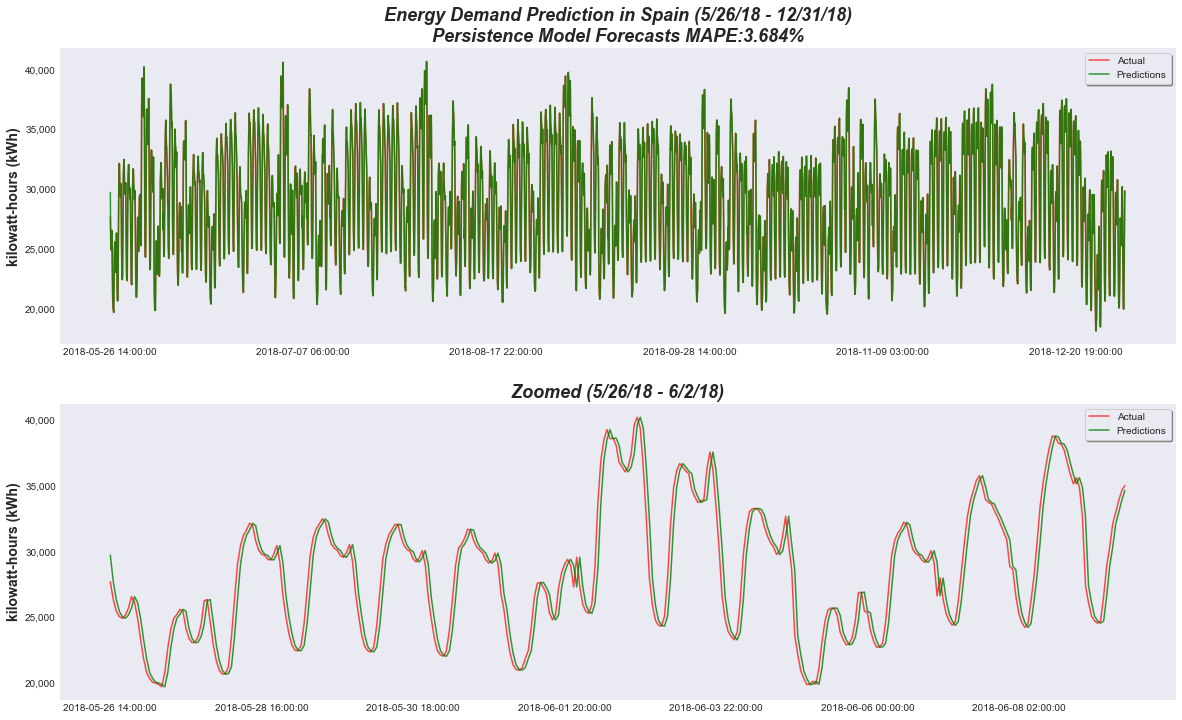

In [7]:
#Read Libraries
from TimeSeriesStats import model_performance
from TimeseriesPlotter import timeseries_plot

#Evaluate base model and store as metrics
metrics = model_performance(predictions,Y,'Persistence Model')

#Create fig
f, ax = plt.subplots(2,1,figsize = (20,12))

#Plot data 2 week zoom
timeseries_plot(Y, ax=ax[0],color = 'red', alpha=.7)
timeseries_plot(persistence_model_predictions, ax=ax[0], color = 'green',alpha=.8,
                title ='Energy Demand Prediction in Spain (5/26/18 - 12/31/18)\nPersistence Model Forecasts MAPE:{}%'.format(round(metrics['MAPE'],3)),
                title_dict=title_dict,
               ylabel='kilowatt-hours (kWh)', label_dict=label_dict)

#Plot data 1 week zoom
timeseries_plot(Y[:24*14], ax=ax[1], color = 'red', alpha=.7)
timeseries_plot(persistence_model_predictions[:24*14], ax=ax[1], color = 'green', alpha=.8,
               title = 'Zoomed (5/26/18 - 6/2/18)', title_dict=title_dict,
                ylabel='kilowatt-hours (kWh)', label_dict=label_dict)

###Set plot aesthetics###
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[0].legend(['Actual','Predictions'], frameon = True, shadow = True, loc = 'upper right')

ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].legend(['Actual','Predictions'], frameon = True, shadow = True, loc = 'upper right');

### LSTM Deep Learning Model

**Prepare data**

In [8]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

#Get data
X= train.loc[:, 'total_load_actual_stationary'].values.reshape(-1,1)
Y= test.loc[:, 'total_load_actual_stationary'].values.reshape(-1,1)

#Init scaler
scaler = MinMaxScaler()

#Scale X to split into X_train and y_train
X_scaled = scaler.fit_transform(X)

#Create training and test data for model
#200 time steps to 1 prediction
X_train = []
y_train = []

#For loop to make training/test data where 200 samples are needed to make 1 prediction at t+1
for i in range(200, len(X_scaled)):
    X_train.append(X_scaled[i-200:i])
    y_train.append(X_scaled[i])

#Convert lists to arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

#Check
print('Training data shape:{}\nTraining label shape{}'.format(X_train.shape, y_train.shape))

Training data shape:(29589, 200, 1)
Training label shape(29589, 1)


**Build model**

In [9]:
#Read in libraries
import tensorflow as tf
from tensorflow import keras

#Init Model
model = tf.keras.Sequential()

#Add input layer
model.add(tf.keras.layers.Dense(units = 64, input_shape = (X_train.shape[1], 1)))

#Add LSTM and Dropout Layers
model.add(tf.keras.layers.LSTM(units = 64, return_sequences=True))
model.add(tf.keras.layers.Dropout(.2))

model.add(tf.keras.layers.LSTM(units = 64,return_sequences=True))
model.add(tf.keras.layers.Dropout(.2))

model.add(tf.keras.layers.LSTM(units = 64,return_sequences=True))
model.add(tf.keras.layers.Dropout(.2))

#Add output layer
model.add(tf.keras.layers.Dense(1))

**Compile model and fit to training data**

In [10]:
#Compile
model.compile(loss ='mean_squared_error', optimizer = 'adam'  )

#Fit to training data
model.fit(X_train, y_train, epochs=7, batch_size=32)

Epoch 1/7
925/925 [==============================] - 242s 262ms/step - loss: 0.0153
Epoch 2/7
925/925 [==============================] - 239s 258ms/step - loss: 0.0117
Epoch 3/7
925/925 [==============================] - 240s 259ms/step - loss: 0.0113
Epoch 4/7
925/925 [==============================] - 239s 259ms/step - loss: 0.0111
Epoch 5/7
925/925 [==============================] - 243s 263ms/step - loss: 0.0110
Epoch 6/7
925/925 [==============================] - 235s 254ms/step - loss: 0.0109
Epoch 7/7
925/925 [==============================] - 223s 241ms/step - loss: 0.0108


In [19]:
#Set path to save trained model
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Project_Codes\04_Modeling'

#Save Trained model
tf.keras.models.save_model(model = model, filepath = path + '/deep_learningV1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Project_Codes\04_Modeling/deep_learningV1\assets


**Prepare test data**

In [28]:
#Concatenate train and test
total_data = pd.concat([train['total_load_actual_stationary'], test['total_load_actual_stationary']], axis = 0)

#Extract the last 200 of train 
inputs = total_data[(len(total_data) - 200 - len(test)):].values

#Reshape and scale
inputs = inputs.reshape(-1,1)
inputs_transformed = scaler.transform(inputs)

inputs_transformed.shape

(5457, 1)

In [30]:
#Create X_test for model to make predictions on
X_test = []

#Create loop to make 200 time steps for 1 prediction
for i in range(200, 5457):
    X_test.append(inputs_transformed[i - 200:i])

#Convert list to array
X_test = np.array(X_test)

#Reshape X_test
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

#Check
X_test.shape

(5257, 200, 1)

**Make predictions and evaluate results**

In [31]:
predictions = model.predict(X_test, batch_size=32)

In [32]:
predictions.shape

(5257, 200, 1)

In [21]:
X_test[1]

array([[0.55518081],
       [0.59888025],
       [0.62246636],
       [0.62432499],
       [0.63554424],
       [0.66212554],
       [0.67456916],
       [0.63970611],
       [0.602987  ],
       [0.57728775],
       [0.55467525],
       [0.52823638],
       [0.53396556],
       [0.58973828],
       [0.70007802],
       [0.72659948],
       [0.70896789],
       [0.71406691],
       [0.70138819],
       [0.6766284 ],
       [0.64556576],
       [0.6035588 ],
       [0.5386914 ],
       [0.4726431 ],
       [0.42807854],
       [0.47270444],
       [0.5451664 ],
       [0.59353031],
       [0.60652337],
       [0.62078352],
       [0.64316746],
       [0.62214055],
       [0.57197765],
       [0.53114298],
       [0.50298411],
       [0.48666017],
       [0.49871427],
       [0.56372992],
       [0.70158478],
       [0.77356697],
       [0.77018749],
       [0.76638767],
       [0.74280725],
       [0.72706853],
       [0.6969272 ],
       [0.64659658],
       [0.5841891 ],
       [0.504

In [16]:
#Store results in a pandas preabs
results = pd.DataFrame(index=test.index.values)

results['total_load_actual']= test['total_load_actual']
results['total_load_actual_season']= test['total_load_actual_season']
results['total_load_actual_trend']= test['total_load_actual_trend']
results


,total_load_actual,total_load_actual_season,total_load_actual_trend
2018-05-26 14:00:00,27714.0,2141.914399,24989.354167
2018-05-26 15:00:00,26342.0,1921.311927,24905.375000
2018-05-26 16:00:00,25461.0,1993.187712,24823.750000
2018-05-26 17:00:00,25063.0,2323.286685,24747.166667
2018-05-26 18:00:00,24944.0,2489.289653,24668.687500
...,...,...,...
2018-12-31 07:00:00,23850.0,2856.356263,26212.750000
2018-12-31 08:00:00,25969.0,3004.248460,26236.187500
2018-12-31 09:00:00,28382.0,2840.023129,26184.833333
2018-12-31 10:00:00,29873.0,2473.497661,26070.208333


### Build Multivariate LSTM model

**Prepare data**